In [258]:
source("../../BrusselSprouts/scripts/functions.R")
files=list.files(path = "~/data/trd/genotypes", pattern = ".mpileup-readable.txt.gz$", full.names = TRUE)
files=naturalsort(files)
files

[1] "/home/jnrunge/data/trd/genotypes/YJNRC2.mpileup-readable.txt.gz" 
[2] "/home/jnrunge/data/trd/genotypes/YJNRC17.mpileup-readable.txt.gz"
[3] "/home/jnrunge/data/trd/genotypes/YJNRC18.mpileup-readable.txt.gz"

In [259]:
i=2

In [260]:
sample=getFirst_v2(basename(files[i]), split=".")
sample

[1] "YJNRC17"

In [261]:
SameAllele=function(x){
    # bcftools does not let me compare GTs between samples, so here I am finding the few instances where my loci filter does not work (when both are 2/2 I think)
    a1=substr(OHLoci$V5[x],1,1)
    a2=substr(OHLoci$V6[x],1,1)
    
    return(a1==a2)
}

In [231]:
OHLoci=fread(paste0("~/data/TRD/Oppo-Homo-Pos/",sample,".ohloci.gz"))
OHLoci=OHLoci[!unlist(lapply(1:nrow(OHLoci), SameAllele)),]
head(OHLoci)
nrow(OHLoci)

,V1,V2
,<chr>,<int>
1,chromosome1,986
2,chromosome1,990
3,chromosome1,2718
4,chromosome1,12361
5,chromosome1,12363
6,chromosome1,12396


[1] 21698

In [270]:
data=fread(files[i])
summary(data$countID1-data$countID2)
data=subset(data, paste(chr,pos) %in% paste(OHLoci$V1,OHLoci$V2)) # to implement the fix above but also in case OHLoci has been made stricter since last mpilup
chrs=summarise(group_by(data, chr),maxPos=max(pos))

data$global_pos=data$pos
for(c in 2:length(unique(data$chr))){
    chr=unique(data$chr)[c]
    data$global_pos[data$chr==chr]=data$pos[data$chr==chr]+sum(chrs$maxPos[chrs$chr%in%unique(data$chr)[1:(c-1)]])
}
head(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-652.00    0.00   18.00   62.28  143.00 6515.00 

,chr,pos,countID1,countID2,global_pos
,<chr>,<int>,<int>,<int>,<int>
55,chromosome1,12396,145,1,12396
65,chromosome1,13442,122,0,13442
67,chromosome1,13848,48,0,13848
68,chromosome1,13872,42,0,13872
69,chromosome1,13942,13,4,13942
70,chromosome1,13965,7,9,13965


In [263]:
chrs$global_pos=cumsum(chrs$maxPos)

In [264]:
data$sumCount=data$countID1+data$countID2
data=subset(data, sumCount > 0)
data=subset(data, sumCount<=quantile(data$sumCount, 0.95) & sumCount>=quantile(data$sumCount, 0.05))

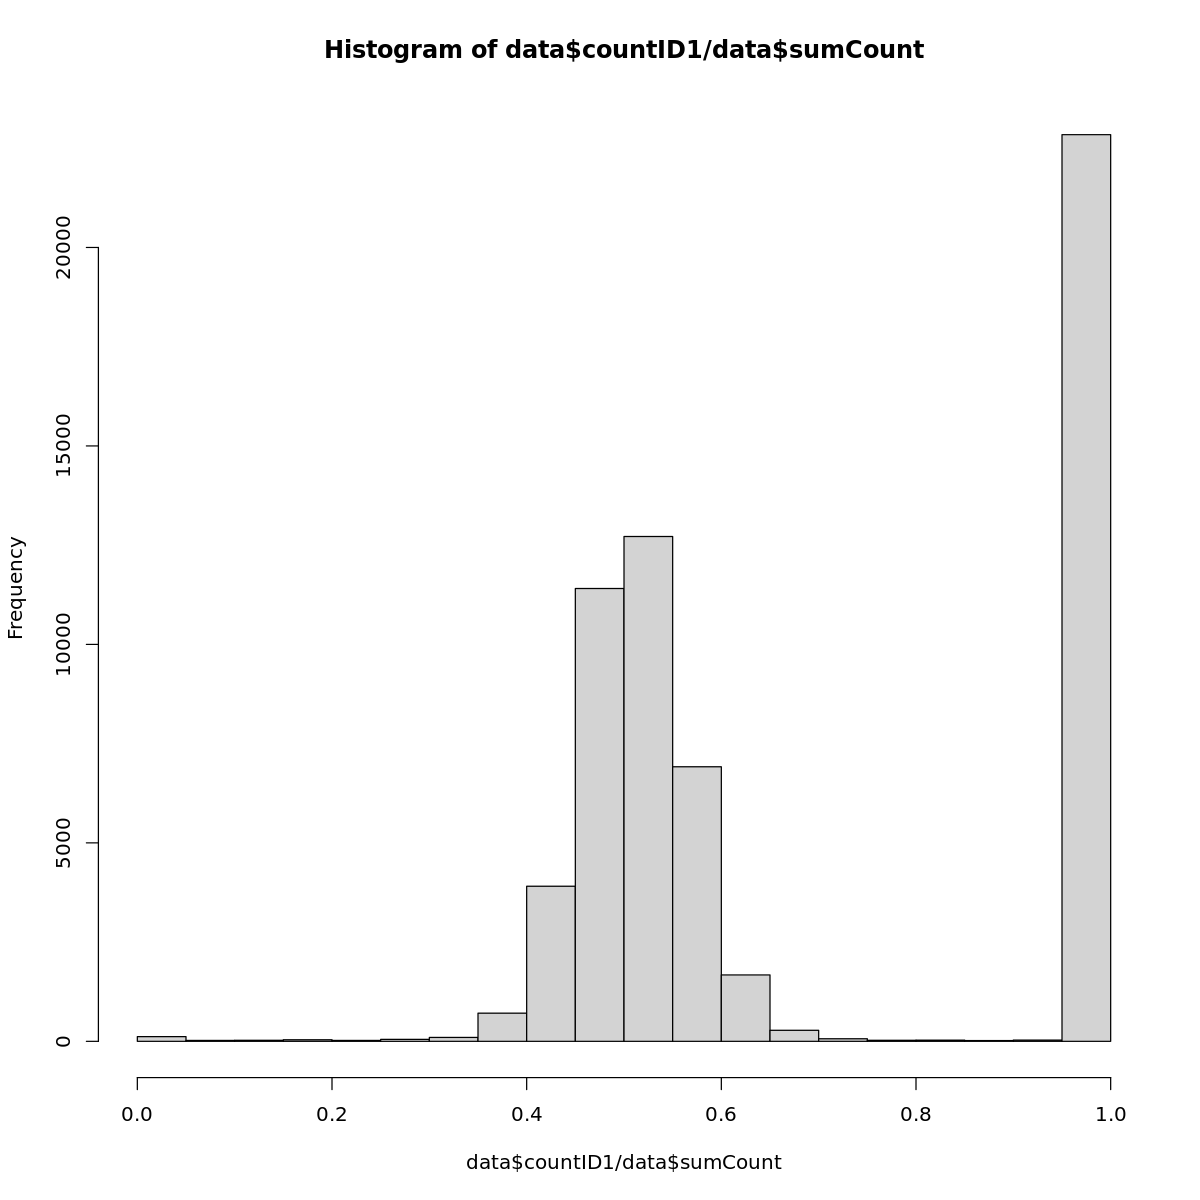

In [265]:
hist(data$countID1/data$sumCount)

In [266]:
head(data)

,chr,pos,countID1,countID2,global_pos,sumCount
,<chr>,<int>,<int>,<int>,<int>,<int>
9,chromosome1,2719,104,0,2719,104
10,chromosome1,2825,91,0,2825,91
19,chromosome1,3584,91,0,3584,91
20,chromosome1,3942,100,0,3942,100
21,chromosome1,4091,101,1,4091,102
22,chromosome1,4119,88,0,4119,88


In [248]:
#fwrite(badLoci<-subset(data, sumCount>=10 & countID1 == sumCount, select=c("chr","pos")), "~/tmpBadAlleles.tsv", sep="\t", col.names = FALSE)

#mpileup=fread("~/data/trd/genotypes/YJNRC2.mpileup.txt.gz")
#mpileup=subset(mpileup,paste(V1,V2) %in% paste(badLoci$chr,badLoci$pos))
#mpileup

In [268]:
data[data$countID1==data$sumCount,]

,chr,pos,countID1,countID2,global_pos,sumCount
,<chr>,<int>,<int>,<int>,<int>,<int>
9,chromosome1,2719,104,0,2719,104
10,chromosome1,2825,91,0,2825,91
19,chromosome1,3584,91,0,3584,91
20,chromosome1,3942,100,0,3942,100
22,chromosome1,4119,88,0,4119,88
28,chromosome1,4949,89,0,4949,89
37,chromosome1,5627,95,0,5627,95
38,chromosome1,5741,108,0,5741,108
43,chromosome1,6356,87,0,6356,87


In [267]:
OHLoci_AF1=subset(OHLoci, paste(V1,V2) %in% paste(data$chr[data$countID1==data$sumCount],
                                                 data$pos[data$countID1==data$sumCount]))

In [238]:
head(OHLoci_AF1)

,V1,V2
,<chr>,<int>
15,chromosome1,13609
16,chromosome1,13624
18,chromosome1,13640
22,chromosome1,13760
23,chromosome1,13766
24,chromosome1,13771


`geom_smooth()` using formula = 'y ~ x'


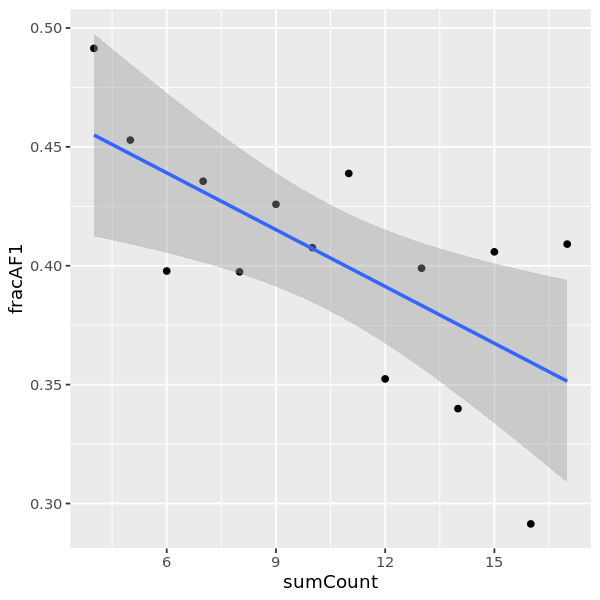

In [255]:
options(repr.plot.width=5, repr.plot.height=5)
data_summary_AF1=summarise(group_by(data, sumCount), fracAF1=sum(countID1==sumCount)/n())
ggplot(data_summary_AF1, aes(sumCount,fracAF1))+
geom_point()+geom_smooth(method="lm")

In [240]:
mean(data$countID1/data$sumCount)

[1] 0.7115238

In [223]:
summarise(group_by(data,chr), meanAF=mean(countID1/sumCount))

chr,meanAF
<chr>,<dbl>
chromosome1,0.7530794
chromosome10,0.7202680
chromosome11,0.6919739
chromosome12,0.6741680
chromosome13,0.6634672
chromosome14,0.7050382
chromosome15,0.7171845
chromosome16,0.6565800
chromosome2,0.6708549


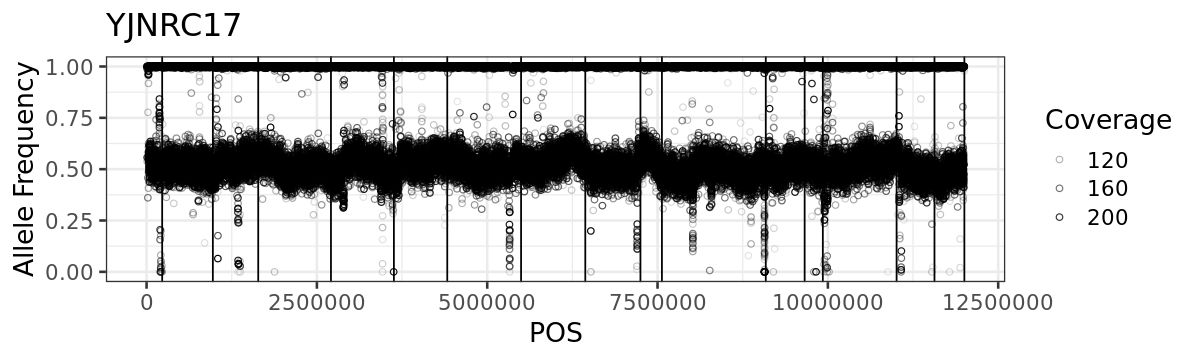

In [224]:
options(repr.plot.width=10, repr.plot.height=3)


print(ggplot(data, aes(global_pos, countID1/sumCount, alpha=sumCount))+
geom_point(shape=1)+
geom_vline(xintercept = chrs$global_pos)+theme_bw(16)+ylab("Allele Frequency")+xlab("POS")+
ggtitle(sample)+labs(alpha="Coverage"))

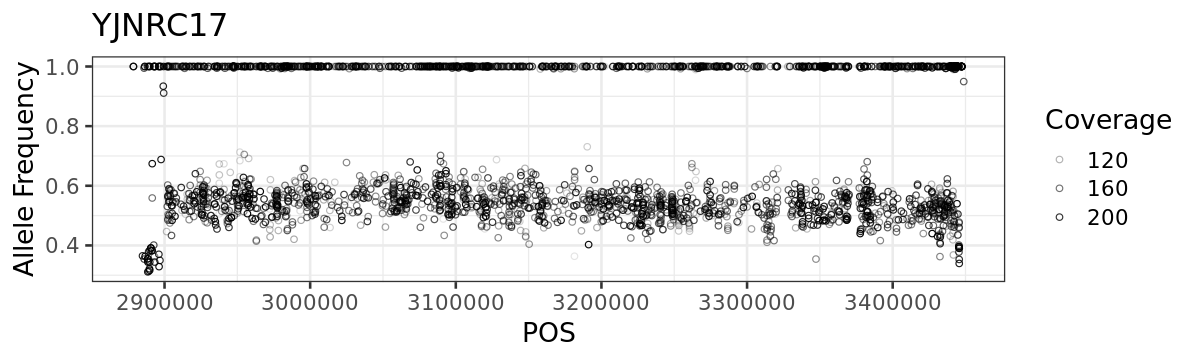

In [225]:
ggplot(subset(data, chr=="chromosome5"), aes(global_pos, countID1/sumCount, alpha=sumCount))+
geom_point(shape=1)+
theme_bw(16)+ylab("Allele Frequency")+xlab("POS")+
ggtitle(sample)+labs(alpha="Coverage")

In [226]:
nrow(subset(data, sumCount>=15 & countID1==sumCount)) / nrow(data)

[1] 0.352593